# TABLE OF CONTENT

1. LSTM architecture
2. Importing Library
3. Data Acquisition
4. Data Preprocessing
5. Model Design
6. Back Testing
7. Risk Management
8. Optimization




# LSTM ARCHITECTURE


  1. Long short-term memory is an artificial recurrent neural network architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can process not only single data points, but also entire sequences of data.

  2. Long Short-Term Memory (LSTM) networks are a type of recurrent neural network capable of learning order dependence in sequence prediction problems. This is a behavior required in complex problem domains like machine translation, speech recognition, and more. LSTMs are a complex area of deep learning.

  3. LSTMs are often referred to as fancy RNNs. Vanilla RNNs do not have a cell state. They only have hidden states and those hidden states serve as the memory for RNNs. Meanwhile, LSTM has both cell states and a hidden states.



Saving architecture.png to architecture.png
Uploaded file "architecture.png" with length 88338 bytes


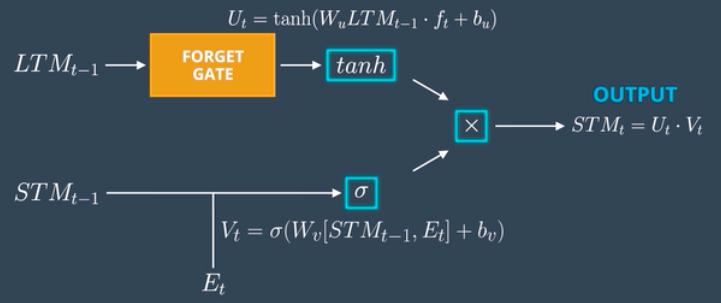

In [1]:
from google.colab import files
uploaded = files.upload()
for filename in uploaded.keys():
    print(f'Uploaded file "{filename}" with length {len(uploaded[filename])} bytes')
    from PIL import Image
from IPython.display import display
image_path = list(uploaded.keys())[0]
image = Image.open(image_path)
display(image)

#LIBRARIES

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import math
import datetime as dt
import matplotlib.pyplot as plt

# For Evalution we will use these library

from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler

# For model building we will use these library

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM


# For PLotting we will use these library

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

# DATA AQCUISITION

In [3]:
df=pd.read_csv('/content/drive/MyDrive/QMCI.csv')

In [4]:
print('Total number of days present in the dataset: ',df.shape[0])
print('Total number of fields present in the dataset: ',df.shape[1])

Total number of days present in the dataset:  1027
Total number of fields present in the dataset:  7


In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,0.04,0.04,0.03,0.04,0.04,164800
1,2018-01-03,0.04,0.06,0.04,0.05,0.05,241300
2,2018-01-04,0.05,0.06,0.05,0.06,0.06,103100
3,2018-01-05,0.05,0.08,0.04,0.08,0.08,448000
4,2018-01-08,0.06,0.10,0.06,0.10,0.10,131800


In [6]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1022,2022-01-24,0.18,0.18,0.16,0.16,0.16,13600
1023,2022-01-25,0.16,0.16,0.16,0.16,0.16,5000
1024,2022-01-26,0.16,0.16,0.16,0.16,0.16,1600
1025,2022-01-27,0.16,0.16,0.16,0.16,0.16,35000
1026,2022-01-28,0.16,0.16,0.16,0.16,0.16,8000


In [7]:
df.shape,df.size

((1027, 7), 7189)

In [8]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1027.000000,1027.000000,1027.000000,1027.000000,1027.000000,1.027000e+03
mean,0.139727,0.145385,0.135190,0.141568,0.141568,5.053126e+04
std,0.047090,0.047917,0.045037,0.045116,0.045116,1.758153e+05
min,0.040000,0.040000,0.030000,0.040000,0.040000,0.000000e+00
25%,0.100000,0.100000,0.100000,0.100000,0.100000,3.000000e+02
50%,0.140000,0.140000,0.140000,0.140000,0.140000,1.290000e+04
75%,0.180000,0.190000,0.180000,0.180000,0.180000,5.210000e+04
max,0.390000,0.400000,0.270000,0.280000,0.280000,4.710100e+06


# DATA PRE-PROCESSING
     
####Data preprocessing is a crucial step in any cryptocurrency trading strategy, as it helps prepare your data for analysis and model training. Here are some key techniques for preprocessing BTC/USDT data:

1. Data Cleaning:

  > Missing Values: Identify and handle missing values. Common methods include dropping rows with missing values, imputing missing values with mean/median/mode, or using specialized algorithms like KNN imputation.
  > Outliers: Detect and address outliers. Outliers can skew your model's results. You can remove outliers, winsorize them (replace extreme values with quantiles), or use robust statistical methods.

2. Data Transformation:

  > Scaling: Feature scaling normalizes the range of different features, making them comparable and improving model convergence. Common scaling methods include MinMaxScaler and StandardScaler.
  > Logarithmic Transformation: Apply logarithmic transformation to highly skewed data (e.g., price) to make the distribution more normal.

3. Feature Engineering:

  > Technical Indicators: Calculate technical indicators like Bollinger Bands, MACD, RSI, etc., to extract additional features from the price data. These indicators can capture trends, momentum, and volatility.
  > Time Lag Features: Create lagged features by adding previous values of a feature as new features. This can help capture the temporal dynamics of the price movement.
  > Discretization: Convert continuous features into categorical features if needed. For example, you could discretize price into price ranges.

4. Data Augmentation:

  Synthetic Data Generation: Generate synthetic BTC/USDT data using techniques like Generative Adversarial Networks (GANs) to increase the size and diversity of your training data.



####Data Cleaning
Checking & evaluating null values and counting Duplicated values

In [9]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [10]:
df.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1027 entries, 0 to 1026
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1027 non-null   object 
 1   Open       1027 non-null   float64
 2   High       1027 non-null   float64
 3   Low        1027 non-null   float64
 4   Close      1027 non-null   float64
 5   Adj Close  1027 non-null   float64
 6   Volume     1027 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 56.3+ KB


In [12]:
df.duplicated().sum()

0

####Data Tranformation

1.   Here we are Aggresgating the data values by timme intervals.
2.   calculating metrics for highs&lows measures.

3.   cross Tabulation

In [13]:
print('\n Volume of data with highs&Lows per annum measures \n')


# Technique 1: Aggregating data by time intervals (e.g., yearly)
df['Volume'] = pd.to_datetime(df['Volume'])
df_yearly_aggregated = df.groupby(pd.Grouper(key='Volume', freq='D')).sum().reset_index()


# Display the dataframe with yearly aggregation
print("\nDataFrame with yearly aggregation:")
print(df_yearly_aggregated)


# Technique 2: Calculating metrics (e.g., average of high&lows per yearly measure)
df_avg = df.groupby('High')['Low'].mean().reset_index()


# Display the dataframe with per annum measures
print("\nAverage of high&lows per annum measurings:")
print(df_avg)


# Technique 3: Pivot table for cross-tabulation
pivot_table = df.pivot_table(index='Volume', columns='High', values='Low', aggfunc='sum')


# Display the pivot table
print("\n (Cross-tabulation):\n")
print(pivot_table)


 Volume of data with highs&Lows per annum measures 


DataFrame with yearly aggregation:
      Volume   Open    High     Low   Close  Adj Close
0 1970-01-01  143.5  149.31  138.84  145.39     145.39

Average of high&lows per annum measurings:
    High       Low
0   0.04  0.030000
1   0.06  0.050000
2   0.07  0.066000
3   0.08  0.075556
4   0.09  0.084026
5   0.10  0.092931
6   0.11  0.102308
7   0.12  0.109744
8   0.13  0.111200
9   0.14  0.128627
10  0.15  0.138000
11  0.16  0.154074
12  0.17  0.163382
13  0.18  0.172651
14  0.19  0.181750
15  0.20  0.187105
16  0.21  0.189623
17  0.22  0.196667
18  0.23  0.201667
19  0.24  0.201429
20  0.25  0.212857
21  0.26  0.220000
22  0.28  0.210000
23  0.32  0.270000
24  0.40  0.240000

 (Cross-tabulation):

High                           0.04  0.06  0.07  0.08  0.09  0.10  0.11  0.12  \
Volume                                                                          
1970-01-01 00:00:00.000000000   NaN   NaN  0.28  2.08  1.44  6.90  1.87  0.84

<ipython-input-13-2a1ec7fd47b9>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_yearly_aggregated = df.groupby(pd.Grouper(key='Volume', freq='D')).sum().reset_index()


#### EXPLORING DATA ANALYSIS

Stock price Analysis form start

In [14]:
sd=df.iloc[0][0]
ed=df.iloc[-1][0]


print('Starting Date',sd)
print('Ending Date',ed)

Starting Date 2018-01-02
Ending Date 2022-01-28


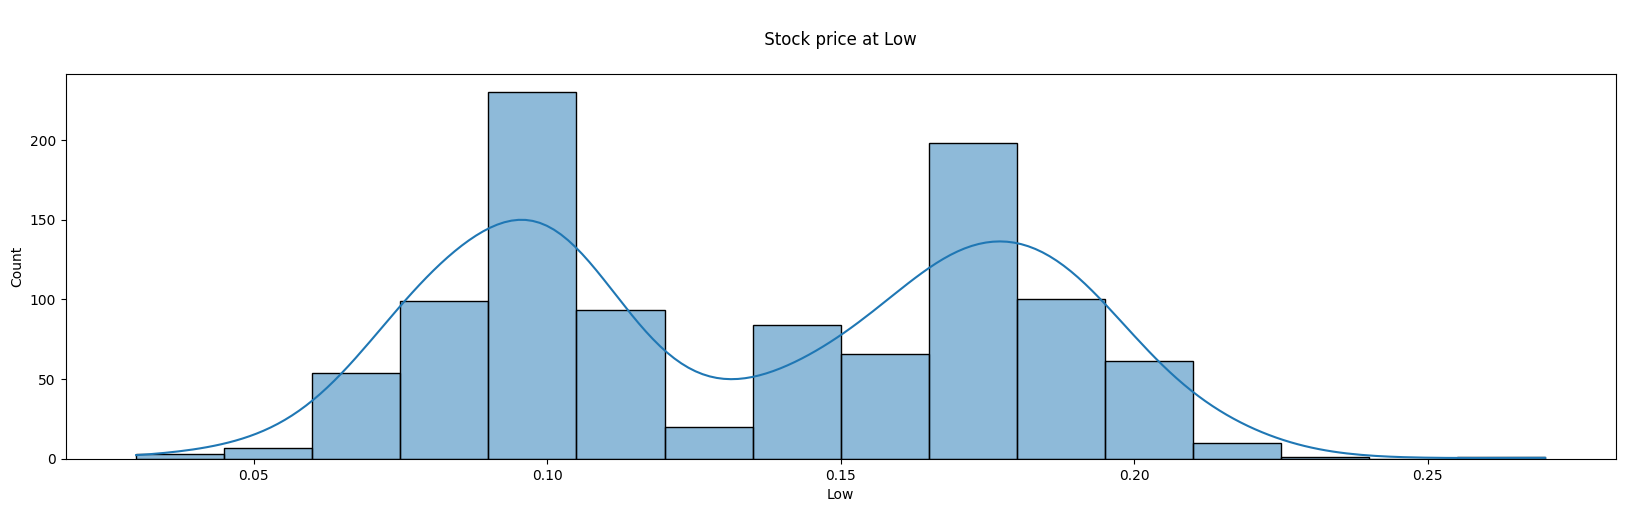

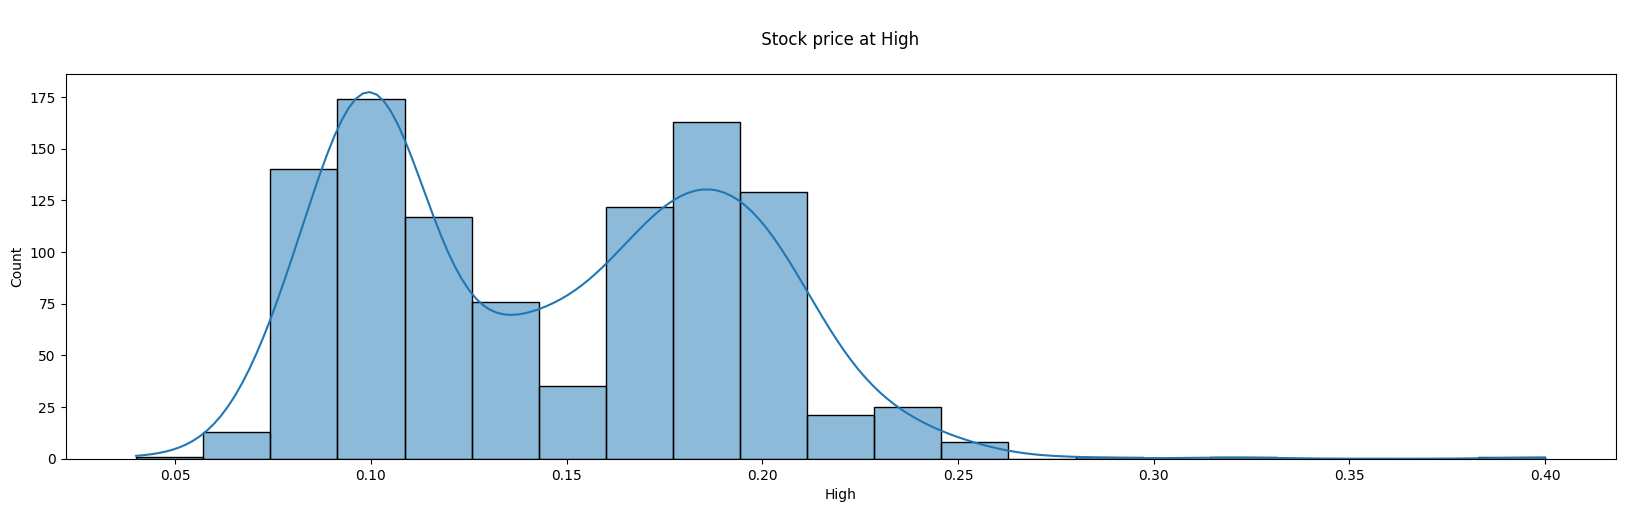

In [15]:
plt.figure(figsize=(20, 5))
sns.histplot(df['Low'], kde=True)
plt.title('\n Stock price at Low \n')
plt.show()

plt.figure(figsize=(20, 5))
sns.histplot(df['High'], kde=True)
plt.title('\n Stock price at High \n')
plt.show()

In [16]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_2018 = df.loc[(df['Date'] >= '2018-01-02')
                     & (df['Date'] < '2018-12-31')]

y_2018.drop(y_2018[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2018-01-02,0.04,0.04,0.03,0.04
1,2018-01-03,0.04,0.06,0.04,0.05
2,2018-01-04,0.05,0.06,0.05,0.06
3,2018-01-05,0.05,0.08,0.04,0.08
4,2018-01-08,0.06,0.10,0.06,0.10
...,...,...,...,...,...
245,2018-12-21,0.10,0.10,0.10,0.10
246,2018-12-24,0.10,0.10,0.10,0.10
247,2018-12-26,0.07,0.10,0.07,0.10
248,2018-12-27,0.07,0.07,0.07,0.07


In [17]:
monthvise= y_2018.groupby(y_2018['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,0.094286,0.105714
February,0.090526,0.093158
March,0.097143,0.099524
April,0.094286,0.098571
May,0.077727,0.077727
June,0.074762,0.081905
July,0.097143,0.100000
August,0.090870,0.094783
September,0.125263,0.135263


Month wise Stock price ratings

In [18]:
y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_high = y_2018.groupby(df['Date'].dt.strftime('%B'))['High'].max()
monthvise_high = monthvise_high.reindex(new_order, axis=0)

monthvise_low = y_2018.groupby(y_2018['Date'].dt.strftime('%B'))['Low'].min()
monthvise_low = monthvise_low.reindex(new_order, axis=0)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=monthvise_high.index,
    y=monthvise_high,
    name='Stock high Price',
    marker_color='rgb(0, 153, 204)'
))
fig.add_trace(go.Bar(
    x=monthvise_low.index,
    y=monthvise_low,
    name='Stock low Price',
    marker_color='rgb(255, 128, 0)'
))

fig.update_layout(barmode='group',
                  title=' Monthwise High and Low stock price!')
fig.show()

Note the we have all months at 2018 has active stock prices, no NAN values

In [19]:
fig = go.Figure()

fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Open'],
    name='Stock Open Price',
    marker_color='Plum'
))
fig.add_trace(go.Bar(
    x=monthvise.index,
    y=monthvise['Close'],
    name='Stock Close Price',
    marker_color='Azure'
))

fig.update_layout(barmode='group', xaxis_tickangle=-45,
                  title='Monthwise comparision between Stock open and close price')
fig.show()

In [20]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_2018, x=y_2018.Date, y=[y_2018['Open'], y_2018['Close'],
                                          y_2018['High'], y_2018['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Stock analysis chart', font_size=15, font_color='Blue',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

Similarly according to above 2018 analysis as per year 2019, 2020, 2021,2022 also as similar prediction process but results may different using month wise and year wise analysis.

####Overall Yearwise Stock price Analysis

In [21]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')

y_overall = df.loc[(df['Date'] >= '2018-01-02')
                     & (df['Date'] <= '2022-01-28')]

y_overall.drop(y_overall[['Adj Close','Volume']],axis=1)

,Date,Open,High,Low,Close
0,2018-01-02,0.04,0.04,0.03,0.04
1,2018-01-03,0.04,0.06,0.04,0.05
2,2018-01-04,0.05,0.06,0.05,0.06
3,2018-01-05,0.05,0.08,0.04,0.08
4,2018-01-08,0.06,0.10,0.06,0.10
...,...,...,...,...,...
1022,2022-01-24,0.18,0.18,0.16,0.16
1023,2022-01-25,0.16,0.16,0.16,0.16
1024,2022-01-26,0.16,0.16,0.16,0.16
1025,2022-01-27,0.16,0.16,0.16,0.16


In [22]:
monthvise= y_overall.groupby(y_overall['Date'].dt.strftime('%B'))[['Open','Close']].mean()
new_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
             'September', 'October', 'November', 'December']
monthvise = monthvise.reindex(new_order, axis=0)
monthvise

,Open,Close
Date,,
January,0.141188,0.145347
February,0.143158,0.141842
March,0.137816,0.138966
April,0.134524,0.136667
May,0.137143,0.137976
June,0.125294,0.127765
July,0.140000,0.142093
August,0.146591,0.147386
September,0.151605,0.155926


In [41]:
names = cycle(['Stock Open Price','Stock Close Price','Stock High Price','Stock Low Price'])

fig = px.line(y_overall, x=y_overall.Date, y=[y_overall['Open'], y_overall['Close'],
                                          y_overall['High'], y_overall['Low']],
             labels={'Date': 'Date','value':'Stock value'})
fig.update_layout(title_text='Overall Stock analysis chart', font_size=15, font_color='black',legend_title_text='Stock Parameters')
fig.for_each_trace(lambda t:  t.update(name = next(names)))
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)

fig.show()

#Build LSTM Model Design

>Designing a model for BTC/USDT trading requires careful consideration of various factors and techniques. Here's a breakdown to help you get started:

1. Defining Your Trading Goal:
          
          *   To predict short-term movements for scalping or swing trading and  involve models focusing on technical indicators and market momentum.
          *   Aim for long-term portfolio allocation based on fundamental analysis as Training  & Testing .


2. Choosing a Model Technique:

          *   Statistical Models: Moving averages, ARIMA, GARCH can analyze historical data for trend and volatility patterns.
          *   Machine Learning Models: LSTM Models can rum complex realtions from diverse data ,Random forests , Neural networks.

          






In [24]:
Closedf = df[['Date','Close']]
print("shape of Closedf >>", Closedf.shape)

shape of Closedf >> (1027, 2)


In [25]:
Opendf = df[['Date','Open']]
print("shape of Opendf >>",Opendf.shape)

shape of Opendf >> (1027, 2)


##### By taking sample as 2022 year stock prices we are predicting final training & testing analysis.

In [26]:
fig = px.line(Closedf, x=Closedf.Date, y=Closedf.Close,labels={'date':'Date','Close':'Close Stock'})
fig.update_traces(marker_line_width=5, opacity=1, marker_line_color='orange')
fig.update_layout(title_text='Whole period of timeframe of Bitcoin close price 2018-2022', plot_bgcolor='white',
                  font_size=10, font_color='Plum')
fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()



In [27]:
closedf = Closedf[Closedf['Date'] > '2021-02-19']
close_stock = closedf.copy()
print("Total data for prediction: ",closedf.shape[0])

Total data for prediction:  238


In [28]:
closedf

,Date,Close
789,2021-02-22,0.23
790,2021-02-23,0.20
791,2021-02-24,0.22
792,2021-02-25,0.22
793,2021-02-26,0.19
...,...,...
1022,2022-01-24,0.16
1023,2022-01-25,0.16
1024,2022-01-26,0.16
1025,2022-01-27,0.16


Deleting data column and Normalizing using MinMax Scaler

In [29]:
del closedf['Date']
scaler=MinMaxScaler(feature_range=(0,1))
closedf=scaler.fit_transform(np.array(closedf).reshape(-1,1))
print(closedf.shape)

(238, 1)


Slicing data into Training set and Testing set

In [30]:
training_size=int(len(closedf)*0.60)
test_size=len(closedf)-training_size
train_data,test_data=closedf[0:training_size,:],closedf[training_size:len(closedf),:1]
print("train_data: ", train_data.shape)
print("test_data: ", test_data.shape)

train_data:  (142, 1)
test_data:  (96, 1)


Transform the Close price based on Time-series-analysis forecasting requirement

In [31]:
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]             ###i=0, 0,1,2,3-----99   100
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [32]:
time_step = 20
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test", y_test.shape)

X_train:  (121, 20)
y_train:  (121,)
X_test:  (75, 20)
y_test (75,)


Reshape input of samples using LSTM

In [33]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)

X_train:  (121, 20, 1)
X_test:  (75, 20, 1)


##### Actual Model Building

In [34]:
model=Sequential()

model.add(LSTM(10,input_shape=(None,1),activation="relu"))

model.add(Dense(1))

model.compile(loss="mean_squared_error",optimizer="adam")

In [35]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=500,batch_size=32,verbose=1)

Epoch 1/500
4/4 [==============================] - 2s 85ms/step - loss: 0.2952 - val_loss: 0.0885
Epoch 2/500
4/4 [==============================] - 0s 18ms/step - loss: 0.2721 - val_loss: 0.0789
Epoch 3/500
4/4 [==============================] - 0s 15ms/step - loss: 0.2504 - val_loss: 0.0700
Epoch 4/500
4/4 [==============================] - 0s 21ms/step - loss: 0.2292 - val_loss: 0.0618
Epoch 5/500
4/4 [==============================] - 0s 19ms/step - loss: 0.2107 - val_loss: 0.0545
Epoch 6/500
4/4 [==============================] - 0s 15ms/step - loss: 0.1920 - val_loss: 0.0482
Epoch 7/500
4/4 [==============================] - 0s 15ms/step - loss: 0.1746 - val_loss: 0.0425
Epoch 8/500
4/4 [==============================] - 0s 19ms/step - loss: 0.1602 - val_loss: 0.0371
Epoch 9/500
4/4 [==============================] - 0s 14ms/step - loss: 0.1452 - val_loss: 0.0321
Epoch 10/500
4/4 [==============================] - 0s 14ms/step - loss: 0.1314 - val_loss: 0.0274
Epoch 11/500
4/4 [=

Ploting loss vs Validation loss

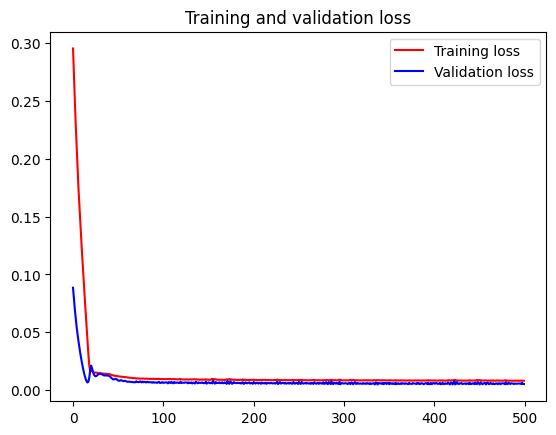

<Figure size 640x480 with 0 Axes>

In [36]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [37]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 4ms/step


((121, 1), (75, 1))

In [38]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train.reshape(-1,1))
original_ytest = scaler.inverse_transform(y_test.reshape(-1,1))

R square score of regression

In [39]:
mse = mean_squared_error(original_ytrain, train_predict)
rmse = (np.sqrt(mse))
r2 = r2_score(original_ytrain, train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

mse = mean_squared_error(original_ytest, test_predict)
rmse = (np.sqrt(mean_squared_error(original_ytest, test_predict)))
r2 = r2_score(original_ytest, test_predict)

print("the model performance for testing set")
print("--------------------------------------")
print('MSE is {}'.format(mse))
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

The model performance for training set
--------------------------------------
MSE is 6.610760154319203e-05
RMSE is 0.008130658124850167
R2 score is 0.7155130814784918


the model performance for testing set
--------------------------------------
MSE is 4.30262454980703e-05
RMSE is 0.0065594394194984605
R2 score is 0.40883578181083136




Variance regression score

In [40]:
print("Train data explained variance regression score:",
      explained_variance_score(original_ytrain, train_predict))
print("Test data explained variance regression score:",
      explained_variance_score(original_ytest, test_predict))

Train data explained variance regression score: 0.7175276143931111
Test data explained variance regression score: 0.4556369362180517
